## Task # 3 - To Explore Unsupervised Machine Learning 


### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [50]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Loading data

In [51]:
df = pd.read_csv('downloads/iris.csv')

In [52]:
df.head() #to know about first 5 rows and columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step 2: Data Preprocessing

In [53]:
df = df.drop('Species',axis = 1)
df = df.drop('Id', axis = 1)

# Step 3: Data Visualization

### To find optimum number of clusters

In [54]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
squared_distances = []

K = range(1,11)

for i in K:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    squared_distances.append(kmeans.inertia_)



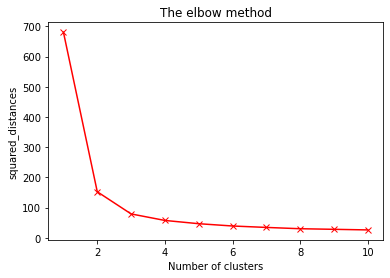

In [55]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
import matplotlib.pyplot as plt
plt.plot(K, squared_distances, 'bx-',color = 'red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('squared_distances') 
plt.show()

###  This is known as elbow method. 3 is the optimum no. of clusters because we can visualise an elbow like bending line at k=3

In [56]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(df)

In [57]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualising the clusters

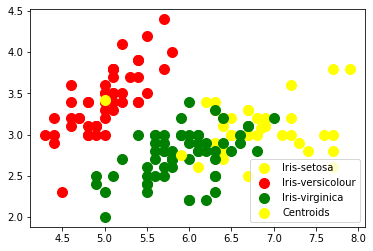

In [58]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## End of notebook!
## Thanks